In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.special import erf

from plot_config import *

In [10]:
data = pd.read_csv(r"Run_11_08_2022_11.29.16_1hr_self_130_ZS.txt", comment="#", sep="\s+")
print(data)

       Event  EvType  ASIC  ChType  Ch  ADC
0          0      11     2      11   0    0
1          1      11     2      10  21  557
2          2      11     2      10  27  571
3          3      11     2      10  20  580
4          4      11     2      10   8  605
...      ...     ...   ...     ...  ..  ...
10039   9822      11     2      10   4  594
10040   9823      11     2      10   4  581
10041   9824      11     2      10  29  622
10042   9825      11     2      11   0    0
10043   9826      11     2      10  10  669

[10044 rows x 6 columns]


In [11]:
def landau(x, mu, c):
    return np.exp(-0.5 * ((x - mu) / c + np.exp(-(x - mu) / c)))

<Figure size 640x480 with 0 Axes>

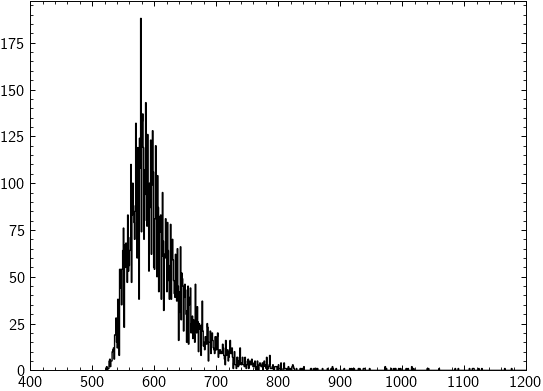

In [12]:
dataADC = data.ADC
dataADC = dataADC[dataADC != 0]
bin_edges = np.arange(dataADC.min(), dataADC.max() + 1, 1)

plt.clf()
fig, ax1 = plt.subplots()
ax1.hist(dataADC, bins=bin_edges, edgecolor='black', histtype='step')
ax1.set_xlim([400, 1200])
plt.show()

<Figure size 640x480 with 0 Axes>

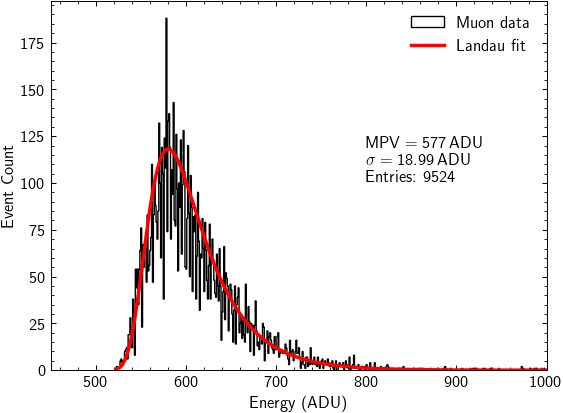

In [66]:
dataADC = data.ADC
filtered_data = dataADC[dataADC != 0]
bin_edges = np.arange(filtered_data.min(), filtered_data.max() + 1, 1)

hist_values, bins, _ = plt.hist(filtered_data, bins=bin_edges, histtype='step', edgecolor='black')

mu, c = np.mean(filtered_data)-30, np.std(filtered_data)/2.7

bin_centers = 0.5 * (bins[1:] + bins[:-1])

landau_values = landau(bin_centers, mu, c)

# Adjust the normalization of the Landau distribution
scaling_factor = np.sum(hist_values) / np.sum(landau_values)
landau_values *= scaling_factor*1.1


plt.clf()
fig, ax1 = plt.subplots()
ax1.hist(filtered_data, bins=bin_edges, edgecolor='black', histtype='step', label="Muon data")
ax1.plot(bin_centers, landau_values, color="red", linewidth=2.5, label='Landau fit')

ax1.set_xlim([450, 1000])
plt.legend(loc="upper right")
ax1.set_ylabel("Event Count")
ax1.set_xlabel("Energy (ADU)")

# Annotation
ax1.text(
    800,
    125,
    "\n".join((r"$\text{MPV}=\SI{577}{ADU}$", r"$\sigma=\SI{18.99}{ADU}$", r"Entries: 9524")),
    fontsize=12,
    color="black",
    verticalalignment="top",
)

plt.savefig(r"muons_landau_fit.pdf")
plt.show()